<img src="../img/logo.jpg" alt="header" style="height:200px;">
<h1><center>Practica 6  Distance transforms</center></h1>
<h3><b>Alumno:</b> Mothelet Delgado Izaird Alexander</h3>
<h3><b>Boleta:</b> 2012010743</h3>
<h3><b>Grupo:</b> 3CV7</h3>
<h2><center><b>Introducción</b></center></h2>
<p align="justify">La transformación de distancia es un operador que normalmente solo se aplica a imágenes binarias. El resultado de la transformación es una imagen en escala de grises que se parece a la imagen de entrada, excepto que las intensidades de grises  de los puntos dentro de las regiones de primer plano se cambian para mostrar la distancia al límite más cercano desde cada punto.

Una forma de pensar sobre la transformación de distancia es imaginar primero que las regiones de primer plano en la imagen binaria de entrada están hechas de un material inflamable uniforme de combustión lenta. Luego, considere iniciar simultáneamente un incendio en todos los puntos en el límite de una región en primer plano y dejar que el fuego se abra camino hacia el interior. Si luego etiquetamos cada punto en el interior con la cantidad de tiempo que el fuego tardó en llegar primero a ese punto, entonces hemos calculado efectivamente la transformación de distancia de esa región. La Figura 1 muestra una transformación de distancia para una forma rectangular simple.</p>
<img src="../img/distance1.png">


In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import pylab

%matplotlib inline
%load_ext cython


In [2]:
%%cython -a
import numpy as np

def Distance8(image):#asumimos que ambas imagenes son del mismo tamaño
    mask1 = np.array([[255, 255, 255],
                    [255, 255, 1],
                    [1, 1, 1]],np.intc)
    mask2 = np.array([[1, 1, 1],
                    [1, 255, 255],
                    [255, 255, 255]],np.intc)

    image_padded = np.zeros((image.shape[0] + 2  , image.shape[1] + 2 ) , np.intc)
    image_padded [1:image.shape[0]+1, 1:image.shape[1]+1] = image.copy()

    #forward propagation
    for i in range(1,image.shape[0]-1 ):
        for j in range(1, image.shape[1]-1 ):
            if(image_padded[i][j]>0):
                aux = mask2 + image_padded[i-1:i+mask1.shape[0]-1, j-1:j+mask1.shape[1]-1]
                image_padded[i][j] = np.amin( aux )
    
    #backward propagation
    for i in range(image.shape[0]-1,1, -1 ):
        for j in range(image.shape[1]-1, 1,-1 ):
            if(image_padded[i][j]>0):
                aux = mask1 + image_padded[i-1:i+mask1.shape[0]-1, j-1:j+mask1.shape[1]-1]
                image_padded[i][j] = min(image_padded[i][j], np.amin( aux ) )
    
    return image_padded


def Distance4(image):#asumimos que ambas imagenes son del mismo tamaño
    mask1 = np.array([[255, 255, 255],
                    [255, 255, 1],
                    [255, 1, 255]],np.intc)
    mask2 = np.array([[255, 1, 255],
                    [1, 255, 255],
                    [255, 255, 255]],np.intc)

    image_padded = np.zeros((image.shape[0] + 2  , image.shape[1] + 2 ) , np.intc)
    image_padded [1:image.shape[0]+1, 1:image.shape[1]+1] = image.copy()

    #forward propagation
    for i in range(1,image.shape[0]-1 ):
        for j in range(1, image.shape[1]-1 ):
            if(image_padded[i][j]>0):
                aux = mask2 + image_padded[i-1:i+mask1.shape[0]-1, j-1:j+mask1.shape[1]-1]
                image_padded[i][j] = np.amin( aux )
    
    #backward propagation
    for i in range(image.shape[0]-1,1, -1 ):
        for j in range(image.shape[1]-1, 1,-1 ):
            if(image_padded[i][j]>0):
                aux = mask1 + image_padded[i-1:i+mask1.shape[0]-1, j-1:j+mask1.shape[1]-1]
                image_padded[i][j] = min(image_padded[i][j], np.amin( aux ) )
    
    return image_padded

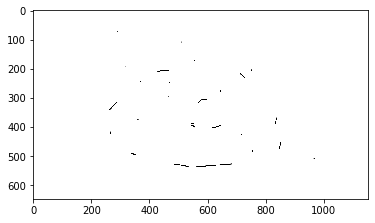

In [3]:
bin1=Image.open("../img/bin3.png").convert("L") #Open the image and convert to gray scale 
bin2=Image.open("../img/bin4.png").convert("L") #Open the image and convert to gray scale 
bin_arr1 = np.asarray(bin1,np.intc) #converts the image to an Numpy Array
bin_arr2 = np.asarray(bin2,np.intc) #converts the image to an Numpy Array

plt.imshow(bin_arr1,cmap=plt.cm.gray)
plt.show()


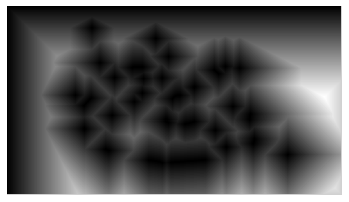

In [4]:
new_image = Distance4(bin_arr1)

plt.imshow(new_image, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

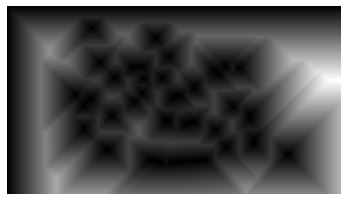

In [5]:
new_image2 = Distance8(bin_arr1)

plt.imshow(new_image2, cmap=plt.cm.gray)
plt.axis('off')
plt.show()